# Exploratory Data Analysis

In [56]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import the dataset

In [37]:
#Load the dataset
df = pd.read_csv('D:\Team Project\data\credit_risk_dataset.csv')

In [38]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Shape of the Dataset

The dataset contains records of 32,581 clients on 12 features (variables)

In [39]:
df.shape

(32581, 12)

## Brief Description of the dataset

This dataset contains various features related to individuals and their loans. The goal is to predict whether a loan will default or not. Below are the features included in the dataset:

| Feature Name | Description |
| --- | --- |
| person_age | Age of the person |
| person_income	| Annual income of the person |
| person_home_ownership | Home ownership status (e.g., rent, own, mortgage) |
| person_emp_length | Employment length in years |
| loan_intent |	Intent of the loan (e.g., education, personal, medical) |
| loan_grade | Grade of the loan |
| loan_amnt | Loan amount |
| loan_int_rate | Interest rate of the loan |
| loan_status | Loan status (0 for non-default, 1 for default) |
| loan_percent_income |	Loan amount as a percentage of income |
| cb_person_default_on_file | Whether the individual has a history of defaulting (Y for yes, N for no) |
| cb_preson_cred_hist_length | Length of the person's credit history in years |

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Basic Descriptive Summary of Numerical Variables

In [41]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Number of Missing Values in Each Column
We have several missing values for the variables 'person_emp_length' and 'loan_int_rate'

In [42]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Number of Unique Values for Each Variable

In [43]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

# 1. Univariate Analysis

## 1.1 Age

In [44]:
df['person_age'].describe()

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

We see that approximately 75% of the clients are below 30 years of age while max value of age is 144. It is clear that these values are anomalies which is most likely the result of erroneous data entry. We consider any value of age above 100 to be an anomaly.

In [51]:
# Checking the number of anamalous entries
count = 1
for i in range(len(df['person_age'])):
    if df['person_age'][i]>100:
        print("Anomalous Entry ",count,": ",df['person_age'][i])
        count=count+1

Anomalous Entry  1 :  144
Anomalous Entry  2 :  144
Anomalous Entry  3 :  123
Anomalous Entry  4 :  123
Anomalous Entry  5 :  144


Since we have a sufficiently large dataset (32,581 entries) so we can afford to lose these numerous anamolous entries in order to maintain data integrity.

In [52]:
# Removing the anamalous entries
df = df[df['person_age']<100]

In [53]:
#Checking the removal of anaomalies
df.shape

(32576, 12)

In [54]:
# Distribution of age after removing anomalies
df['person_age'].describe()

count    32576.000000
mean        27.718044
std          6.204990
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

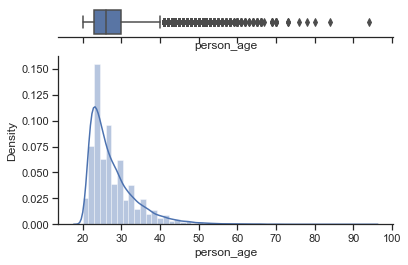

In [63]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['person_age'], ax=ax_box)
sns.distplot(df['person_age'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

The distribution of age is positively skewed and there is significant presence of outliers.

## 1.2 Income

In [64]:
df['person_income'].describe()

count    3.257600e+04
mean     6.588214e+04
std      5.253499e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

<AxesSubplot:xlabel='person_income', ylabel='Density'>

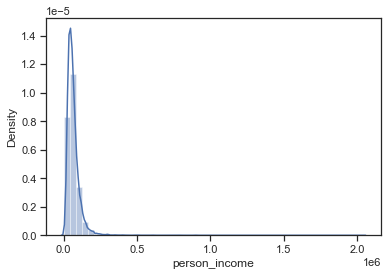

In [65]:
sns.distplot(df['person_income'])